# Lösungen

- Gewichtsfunktionen für Modelle 2 und 3 programmieren

- wenn man kann, dann alles schön in einer Funktion, sodass man per Parameter zwischen den Modellen umschalten kann

- Plotting durch objektorientiertes Matplotlib ersetzen

- schön labeln

## Modell 1 (vorgegeben)

In [55]:
import random
from matplotlib import pyplot as plt

def get_opinion_weights_1(focal_agent, population):
    
    """
    Ermittelt die Gewichte der Beeinflussung des fokalen Agenten durch einen anderen Agenten 
    nach den Regeln von Modell 1.
    """
    
    for agent in population:
        # Distanz zwischen Position des fokalen Agenten i und des Agenten j berechnen
        distance = abs(agent["position"] - focal_agent["position"])

        # Wenn Distanz kleinergleich 1
        if distance <= 1:
            agent["temporary_opinion_weight"] = 1

        # Ansonsten:
        else:
            agent["temporary_opinion_weight"] = 0


def get_opinion_weights_2(focal_agent, population):
    
    """Ermittelt die Beeinflussungsgewichte nach den Regeln von Modell 2."""
    
    # für jeden Agenten bzw. jede Position in Population
    for agent in population:
        
        # Absoluten Meinungsunterschied (nicht Positionsunterschied wie in Modell 1) berechnen
        abs_opinion_diff = abs(agent["opinion"] - focal_agent["opinion"])
        
        # Wenn Meinungsunterschied kleinergleich Grenzwert
        if abs_opinion_diff <= 0.2:
            # Gewicht von 1 einspeichern
            agent["temporary_opinion_weight"] = 1
        
        # Ansonsten: 
        else:
            # Gewicht von 0 einspeichern
            agent["temporary_opinion_weight"] = 0


            
def get_opinion_weights_3(focal_agent, population):
    
    """Ermittelt die Beeinflussungsgewichte nach den Regeln von Modell 3."""
    
    # für jeden Agenten bzw. jede Position in Population
    for agent in population:
        
        # absoluten Meinungsunterschied berechnen
        abs_opinion_diff = abs(agent["opinion"] - focal_agent["opinion"])
        
        
        """Anmerkung zu Gewichten:
        Die Gewichte werden nun auf einen kontinuierlichen Bereich zwischen -1 bis 1 skaliert.
        Meinungsunterschiede von >0.5 bis 1 führen zu Gewichten von <0 bis -1.
        Meinungsunterschiede von 0 bis 0.5 führen zu Gewichten von 1 bis 0,
        """
        
        # Wenn Meinungsunterschied größer Grenzwert
        if abs_opinion_diff > 0.5:
            # negatives Gewicht einspeichern
            agent["temporary_opinion_weight"] = -1 * (2 * abs_opinion_diff - 1)
       
        # ansonsten:
        else:
            # positives Gewicht einspeichern
            agent["temporary_opinion_weight"] = (1 - 2 * abs_opinion_diff)
            
            

def calculate_opinion_change(focal_agent, population):
    
    """Berechnet die Meinungsveränderung des fokalen Agenten i nach der Beeinflussung durch die Population."""
    
    ############################################################
    # Oberhalb des Bruchstriches
    ############################################################
      
    # Liste für die gewichteten Meinungsunterschiede, die später aufsummiert werden
    sum_of_weighted_opinion_diffs = 0
    
    # Für jede Position in Population
    for agent in population:
        
        # Meinungsdifferenz berechnen
        opinion_diff = agent["opinion"] - focal_agent["opinion"]
        
        # Meinungsdifferenz mit entsprechendem Gewicht aus Gewichts-Liste gewichten
        weighted_opinion_diff = opinion_diff * agent["temporary_opinion_weight"]
        
        # gewichtete Meinungsdifferenz an entsprechende Liste anhängen
        sum_of_weighted_opinion_diffs += weighted_opinion_diff
    
    
    ############################################################
    # Unterhalb des Bruchstriches
    ############################################################
    
    # Achtung: Fehler in Formel in Original-Text
    # Es muss korrekterweise die Summe der Beträge der Gewichte berechnet werden
    
    # Summierungsvariable für absolute Beträge der Gewichte
    sum_of_abs_opinion_weights = 0
    
    # für jedes Gewicht in weights
    for agent in population:
        # absoluten Betrag des Gewichts ermitteln
        abs_opinion_weight = abs(agent["temporary_opinion_weight"])
        
        # auf Summe aufsummieren
        sum_of_abs_opinion_weights += abs_opinion_weight
    
    ############################################################
    # Dividieren / Durchschnitt berechnen
    ############################################################
    
    # Meinungsveränderung berechnen
    opinion_change = sum_of_weighted_opinion_diffs / sum_of_abs_opinion_weights
    
    
    ############################################################
    # Meinung beim fokalen Agenten verändern
    ############################################################
    
    # neue Meinung berechnen aus momentaner Meinung und Meinungsveränderung
    new_opinion = focal_agent["opinion"] + opinion_change

    # Meinung in zulässigem Bereich halten
    if new_opinion < 0:
        new_opinion = 0
    elif new_opinion > 1:
        new_opinion = 1

    # Alte Meinung des Agenten durch neue Meinung ersetzen
    focal_agent["opinion"] = new_opinion
    

def run_model(population, ticks, model_type="model1"):

    """Modell mit Beeinflussung durch direkte Nachbarn. Reproduziert Modell 1 in Mäs 2015. """

    # für jeden Zeitschritt
    for t in range(ticks):

        # zufälligen Agenten ziehen
        focal_agent = random.choice(population)

        # Meinungsgewichte ermitteln und jedem Agenten als Attribut einspeichern
        if model_type == "model1":
            get_opinion_weights_1(focal_agent, population)
        elif model_type == "model2":
            get_opinion_weights_2(focal_agent, population)
        elif model_type == "model3":
            get_opinion_weights_3(focal_agent, population)
        else:
            raise ValueError ("Der Parameter 'model_type' hat keinen gültigen Input.")
            
        # Meinungsveränderung berechnen
        calculate_opinion_change(focal_agent, population)

        # Für jeden Agenten
        for agent in population:
            # Aktuelle Meinung archivieren
            agent["opinion_history"].append(agent["opinion"])
    
    
    # Output-Daten plotten
    for agent in population:
        plt.plot(agent["opinion_history"]) #, color = "black")
    plt.xlabel("Tick")
    plt.ylabel("Opinion")
    plt.show()

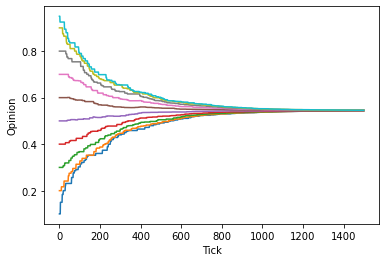

In [56]:
# Population erstellen
population = []
for i in range(10):
    agent = {
        "position": i,
        "opinion": (i+1)/10,
        "temporary_opinion_weight": None,
        "opinion_history": [],
    }
    population.append(agent)

run_model(
    population=population, 
    ticks=1500, 
    model_type="model1",
)

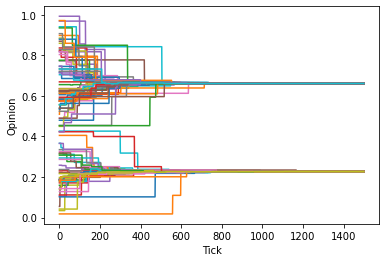

In [57]:
# Population erstellen
population = []
for i in range(100):
    agent = {
        "position": i,
        "opinion": random.random(),
        "temporary_opinion_weight": None,
        "opinion_history": [],
    }
    population.append(agent)

run_model(
    population=population, 
    ticks=1500, 
    model_type="model2",
)

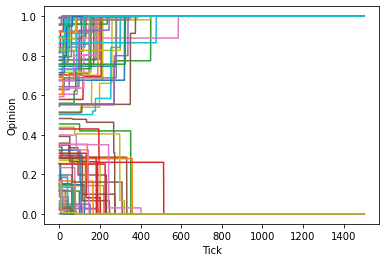

In [58]:
# Population erstellen
population = []
for i in range(100):
    agent = {
        "position": i,
        "opinion": random.random(),
        "temporary_opinion_weight": None,
        "opinion_history": [],
    }
    population.append(agent)

run_model(
    population=population, 
    ticks=1500, 
    model_type="model3",
)

## 2.2 - Modell 2

In [13]:



def run_model_2():

    """Modell mit Beeinflussung durch ähnliche Agenten. Reproduziert Modell 2 in Mäs 2015. """
    
    #############################################################
    # Initialisierung
    #############################################################
    
    # Population erstellen
    population = []
    for i in range(100):
        agent = {
            "position": i,
            "opinion": random.random(),
            "temporary_opinion_weight": None,
            "opinion_history": [],
        }
        population.append(agent)


    #############################################################
    # Simulationsloop
    #############################################################

    # für 1000 Zeitschritte
    for t in range(1000):

        # zufälligen Agenten ziehen
        focal_agent = random.choice(population)
        
        # Gewichte ermitteln
        get_opinion_weights_2(focal_agent, population)
        
        # Meinungsveränderung berechnen
        opinion_change = calculate_opinion_change(focal_agent, population)

        # Meinung verändern / neue Meinung berechnen aus momentaner Meinung und Meinungsveränderung
        new_opinion = focal_agent["opinion"] + opinion_change

        # Alte Meinung durch neue Meinung in Population ersetzen
        focal_agent["opinion"] = new_opinion
        
        # Meinung in zulässigem Bereich halten
        if new_opinion < 0:
            new_opinion = 0
        elif new_opinion > 1:
            new_opinion = 1

        # Für jeden Agenten
        for agent in population:
            # An die opinion_history-Unterliste an Position j die Meinung des Agenten j hängen
            agent["opinion_history"].append(agent["opinion"])
    
    
    # Output-Daten plotten
    for agent in population:
        plt.plot(agent["opinion_history"], color = "black")
    plt.show()

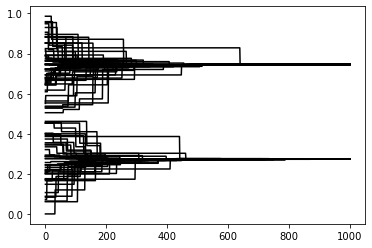

In [14]:
run_model_2()

## 2.3 - Modell 3

In [17]:
def get_weights_3(population, focal_position):
    
    """Ermittelt die Beeinflussungsgewichte nach den Regeln von Modell 3."""
    
    # für jeden Agenten bzw. jede Position in Population
    for agent in population:
        
        # absoluten Meinungsunterschied berechnen
        abs_opinion_diff = abs(agent["opinion"] - focal_agent["opinion"])
        
        
        """Anmerkung zu Gewichten:
        Die Gewichte werden nun auf einen kontinuierlichen Bereich zwischen -1 bis 1 skaliert.
        Meinungsunterschiede von >0.5 bis 1 führen zu Gewichten von <0 bis -1.
        Meinungsunterschiede von 0 bis 0.5 führen zu Gewichten von 1 bis 0,
        """
        
        # Wenn Meinungsunterschied größer Grenzwert
        if abs_opinion_diff > 0.5:
            # negatives Gewicht einspeichern
            agent["temporary_opinion_weight"] = -1 * (2 * abs_opinion_diff - 1)
       
        # ansonsten:
        else:
            # positives Gewicht einspeichern
            agent["temporary_opinion_weight"] = (1 - 2 * abs_opinion_diff)


def run_model_3():

    """Modell mit negativer Beeinflussung. Reproduziert Modell 3 in Mäs 2015. """
    
    #############################################################
    # Initialisierung
    #############################################################

    # Population erstellen
    population = []
    for i in range(100):
        agent = {
            "position": i,
            "opinion": random.random(),
            "temporary_opinion_weight": None,
            "opinion_history": [],
        }
        population.append(agent)


    #############################################################
    # Simulationsloop
    #############################################################

    # für 1000 Zeitschritte
    for t in range(1000):

        # zufälligen Agenten ziehen
        focal_agent = random.choice(population)
        
        # Gewichte ermitteln
        get_opinion_weights_3(focal_agent, population)
        
        # Meinungsveränderung berechnen
        opinion_change = calculate_opinion_change(focal_agent, population)

        # Meinung verändern / neue Meinung berechnen aus momentaner Meinung und Meinungsveränderung
        new_opinion = focal_agent["opinion"] + opinion_change
        
        # Meinung in zulässigem Bereich halten
        if new_opinion < 0:
            new_opinion = 0
        elif new_opinion > 1:
            new_opinion = 1

        # Alte Meinung durch neue Meinung in Population ersetzen
        focal_agent["opinion"] = new_opinion

        # Für jeden Agenten
        for agent in population:
            # An die opinion_history-Unterliste an Position j die Meinung des Agenten j hängen
            agent["opinion_history"].append(agent["opinion"])
    
    
    # Output-Daten plotten
    for agent in population:
        plt.plot(agent["opinion_history"], color = "black")
    plt.show()
        
        

In [18]:
run_model_3()

NameError: name 'get_opinion_weights_3' is not defined